In [1]:
import numpy as np
from copy import copy
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

N=1000000
M=100
C0=np.zeros((2,3,3,N))
x0=np.random.rand(2,M)
#choosing thresholds corresponding to maf=0.6 -- p^2=0.36, p^2+2pq=0.84
p=0.55
x0=(x0>(p**2)).astype(int)+(x0>(p**2+2*p*(1-p))).astype(int)
p0=np.random.rand(M)
p0=(p0>0.66).astype(int)
pheno=copy(p0)
for n in range(N):
    np.random.shuffle(p0)
    for i in range(3):
        for j in range(3):
            for k in range(2):
                C0[k,i,j,n]=np.sum((x0[0]==i)&(x0[1]==j)&(p0==k))

N=C0.sum(0).reshape(9,-1).astype(int)
Nr=np.sum(N,0)[None,:]-np.cumsum(N,0)
np0=C0[0].sum(axis=(0,1)).ravel().astype(int)
np1=copy(np0)
C=np.zeros(N.shape)
for k in range(N.shape[0]):
    C[k][np1!=0]=np.random.hypergeometric(N[k][np1!=0],Nr[k][np1!=0],np1[np1!=0])
    np1=(np0-np.sum(C,0)).astype(int)
C=C.reshape((1,3,3,C0.shape[-1]))
C=np.vstack([C,N.reshape(1,3,3,C0.shape[-1])-C])



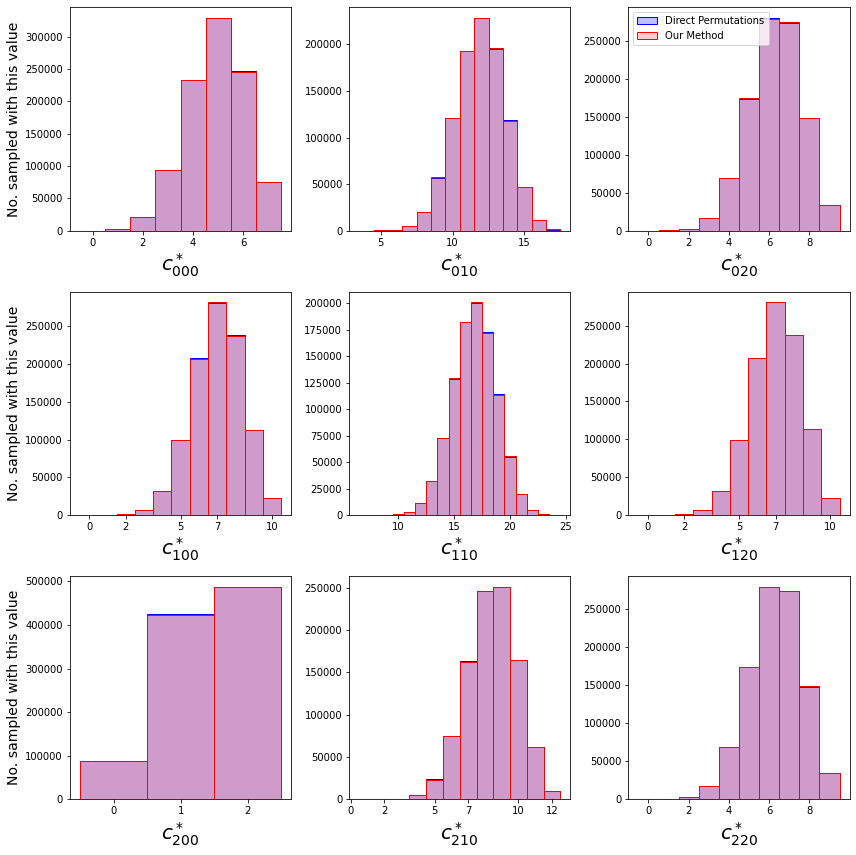

In [3]:
k=0

plt.figure(figsize=(12,12))
for i in range(3):
    for j in range(3):
        plt.subplot(3,3,3*i+j+1)
        b0,b1=np.minimum(np.min(C[k,i,j,:]),np.min(C0[k,i,j,:])),np.maximum(np.max(C[k,i,j,:]),np.max(C0[k,i,j,:]))
        bins=np.arange(b0-0.5,b1+1.5)
        _,_,_=plt.hist(C[k,i,j,:],bins,fc=[0,0,1,0.25],ec=[0,0,1,1],label='Direct Permutations')
        _=plt.hist(C0[k,i,j,:],bins,fc=[1,0.2,0.2,0.25],ec=[1,0,0],label='Our Method')
        plt.xlabel('$c^*_{{{:}{:}{:}}}$'.format(i,j,k),fontsize=20)
        if (i==0)&(j==2):
            plt.legend()
        xt=plt.xticks()[0].astype(int)[1:-1]
        plt.xticks(xt)
        if j==0:
            plt.ylabel('No. sampled with this value',fontsize=14)
plt.tight_layout()

plt.savefig('count_comparison.svg')

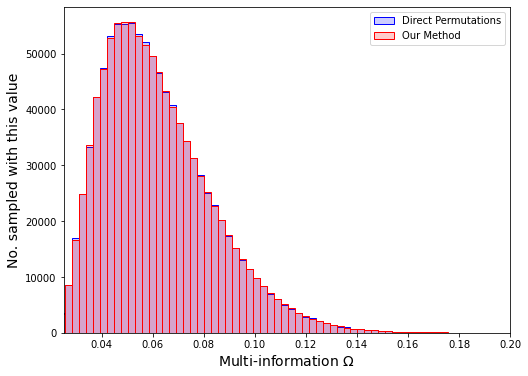

In [6]:
measure=[]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    P=C0/np.sum(C0,axis=(0,1,2))[None,None,None,:]
    H012=-np.nansum(P*np.log(P),axis=(0,1,2))
    H01=-np.nansum(np.sum(P,axis=(2))*np.log(np.sum(P,axis=(2))),axis=(0,1))
    H02=-np.nansum(np.sum(P,axis=(1))*np.log(np.sum(P,axis=(1))),axis=(0,1))
    H12=-np.nansum(np.sum(P,axis=(0))*np.log(np.sum(P,axis=(0))),axis=(0,1))
    H0=-np.nansum(np.sum(P,axis=(1,2))*np.log(np.sum(P,axis=(1,2))),axis=(0))
    H1=-np.nansum(np.sum(P,axis=(0,2))*np.log(np.sum(P,axis=(0,2))),axis=(0))
    H2=-np.nansum(np.sum(P,axis=(0,1))*np.log(np.sum(P,axis=(0,1))),axis=(0))
    #for Omega (multi-information)
    measure.append((H0+H1+H2-H012).ravel())

    P=C/np.sum(C,axis=(0,1,2))[None,None,None,:]
    H012=-np.nansum(P*np.log(P),axis=(0,1,2))
    H01=-np.nansum(np.sum(P,axis=(2))*np.log(np.sum(P,axis=(2))),axis=(0,1))
    H02=-np.nansum(np.sum(P,axis=(1))*np.log(np.sum(P,axis=(1))),axis=(0,1))
    H12=-np.nansum(np.sum(P,axis=(0))*np.log(np.sum(P,axis=(0))),axis=(0,1))
    H0=-np.nansum(np.sum(P,axis=(1,2))*np.log(np.sum(P,axis=(1,2))),axis=(0))
    H1=-np.nansum(np.sum(P,axis=(0,2))*np.log(np.sum(P,axis=(0,2))),axis=(0))
    H2=-np.nansum(np.sum(P,axis=(0,1))*np.log(np.sum(P,axis=(0,1))),axis=(0))
    #for Omega (multi-information)
    measure.append((H0+H1+H2-H012).ravel())
measure=np.vstack(measure)

plt.figure(figsize=(8,6))
h0,bins,_=plt.hist(measure[0],80,fc=[0,0,1,0.2],edgecolor=[0,0,1],label='Direct Permutations')
h,_,_=plt.hist(measure[1],bins,fc=[1,0,0,0.2],edgecolor=[1,0,0],label='Our Method')
plt.xlim(0.025,0.2)
plt.legend()
plt.ylabel('No. sampled with this value',fontsize=14)
plt.xlabel('Multi-information $\Omega$',fontsize=14)
plt.savefig('measure_comparison.svg')